### One test polytomous analysis NRT
___

Using exercises spreadsheets from Designing and Analyzing Language Tests by Oxford.

The purpose of this notebook is to compute the total score for each student and his or her percentage correct score, and then to calculate the various descriptive statistics. We will also calculate $IF*$, $ID*ul$, $r(item-total)$ for NRT with polytomous items, and then to interpret results.

<br>

#### General Setup
___

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss

In [2]:
# styling for plots
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (14,5)

<br>

#### Load the data
___

In [3]:
test = pd.read_excel('Data/one_test_polytomous.xlsx')
test.head()

,Student,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
0,Student01,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,0.0,...,0.5,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,Student02,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0,3.0,...,1.0,1.0,1.0,1.0,2.0,0.0,3.0,0.0,1.0,3.0
2,Student03,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,0.5,2.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,3.0
3,Student04,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.5,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0
4,Student05,1.0,1.0,2.0,1.0,4.0,1.0,0.0,0.0,3.0,...,0.5,2.0,2.0,0.0,2.0,2.0,3.0,0.0,2.0,0.0


In [4]:
# check the dataset info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Student  31 non-null     object 
 1   Q01      31 non-null     float64
 2   Q02      31 non-null     float64
 3   Q03      31 non-null     float64
 4   Q04      31 non-null     float64
 5   Q05      31 non-null     float64
 6   Q06      31 non-null     float64
 7   Q07      31 non-null     float64
 8   Q08      31 non-null     float64
 9   Q09      31 non-null     float64
 10  Q10      31 non-null     float64
 11  Q11      31 non-null     float64
 12  Q12      31 non-null     float64
 13  Q13      31 non-null     float64
 14  Q14      31 non-null     float64
 15  Q15      31 non-null     float64
 16  Q16      31 non-null     float64
 17  Q17      31 non-null     float64
 18  Q18      31 non-null     float64
 19  Q19      31 non-null     float64
 20  Q20      31 non-null     float64
dtypes: float64(20), ob

The dataset contains dichotomous test results for 20 students. 

In [5]:
# calculate total correct answers and add it to the dataframe
test['Total'] = test.loc[:, test.columns != 'Student'].sum(axis=1)
test.head()

,Student,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Total
0,Student01,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,0.0,...,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,14.5
1,Student02,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0,3.0,...,1.0,1.0,1.0,2.0,0.0,3.0,0.0,1.0,3.0,30.0
2,Student03,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,2.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,3.0,16.5
3,Student04,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,14.5
4,Student05,1.0,1.0,2.0,1.0,4.0,1.0,0.0,0.0,3.0,...,2.0,2.0,0.0,2.0,2.0,3.0,0.0,2.0,0.0,27.5


In [6]:
# calculate percetage of correct answers
test['% Correct'] = test['Total'] / len(test.columns[1:21]) * 100
test.head()

,Student,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,...,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Total,% Correct
0,Student01,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,0.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,14.5,72.5
1,Student02,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0,3.0,...,1.0,1.0,2.0,0.0,3.0,0.0,1.0,3.0,30.0,150.0
2,Student03,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,1.0,2.0,1.0,1.0,3.0,16.5,82.5
3,Student04,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,14.5,72.5
4,Student05,1.0,1.0,2.0,1.0,4.0,1.0,0.0,0.0,3.0,...,2.0,0.0,2.0,2.0,3.0,0.0,2.0,0.0,27.5,137.5


<br>

#### Descriptive stats
___

In [7]:
# calculate pandas stats and converting it to a dataframe
stats = pd.DataFrame([test['Total'].describe(), test['% Correct'].describe()]).T
stats

,Total,% Correct
count,32.000000,32.000000
mean,21.406250,107.031250
std,8.542529,42.712644
min,0.000000,0.000000
25%,16.250000,81.250000
50%,21.500000,107.500000
75%,25.625000,128.125000
max,45.000000,225.000000


In [8]:
# renaming the std to std(sample) and add std for population
stats.loc['std(sample)'] = stats.loc['std']
stats.loc['std(pop)'] = [test['Total'].std(ddof=0), test['% Correct'].std(ddof=0)]

# renaming the min and max 
stats.loc['high score'] = stats.loc['max']
stats.loc['low score'] = stats.loc['min']
stats.loc['n'] = stats.loc['count']

# adding other stats
stats.loc['mode'] = [ss.mode(test['Total'])[0][0], ss.mode(test['% Correct'])[0][0]]
stats.loc['var(sample)'] = [test['Total'].var(), test['% Correct'].var()/100]
stats.loc['var(pop)'] = [test['Total'].var(ddof=0), test['% Correct'].var(ddof=0)/100]
stats.loc['range'] = stats.loc['high score'] - stats.loc['low score'] + 1
stats.loc['Q'] = (stats.loc['75%'] - stats.loc['25%']) / 2
stats.loc['skewness'] =  [test['Total'].skew(), test['% Correct'].skew()]
stats.loc['SES'] = np.sqrt((6*stats.loc['n'] * (stats.loc['n']-1)) / 
                           ((stats.loc['n']-2) * (stats.loc['n']+1) * (stats.loc['n']+3)))
stats.loc['skew/SES'] = stats.loc['skewness'] / stats.loc['SES']
stats.loc['kurtosis'] =  test['Total'].kurt()
stats.loc['SEK'] = np.sqrt((4*(stats.loc['n']**2-1)*stats.loc['SES']**2)
                           /((stats.loc['n']-3)*(stats.loc['n']+5)))
stats.loc['kurt/SEK'] = stats.loc['kurtosis'] / stats.loc['SEK']

# removing not needed lines
stats.drop(['std', 'min', 'max', 'count'], axis=0, inplace=True)
stats

,Total,% Correct
mean,21.406250,107.031250
25%,16.250000,81.250000
50%,21.500000,107.500000
75%,25.625000,128.125000
std(sample),8.542529,42.712644
std(pop),8.407992,42.039962
high score,45.000000,225.000000
low score,0.000000,0.000000
n,32.000000,32.000000
mode,18.500000,92.500000


In [9]:
# round all stats to two decimal points and changing the order
stats = np.round(stats, 3)
stats = stats.reindex(index = ['mean','mode','25%', '50%', '75%', 'high score', 'low score', 
                       'range', 'std(pop)', 'std(sample)', 'var(pop)', 'var(sample)', 'Q', 'n',
                      'skewness', 'SES', 'skew/SES','kurtosis', 'SEK', 'kurt/SEK'])
stats.index.name = 'Statistics'
stats

,Total,% Correct
Statistics,,
mean,21.406,107.031
mode,18.500,92.500
25%,16.250,81.250
50%,21.500,107.500
75%,25.625,128.125
high score,45.000,225.000
low score,0.000,0.000
range,46.000,226.000
std(pop),8.408,42.040


<br>

#### Plotting.
___


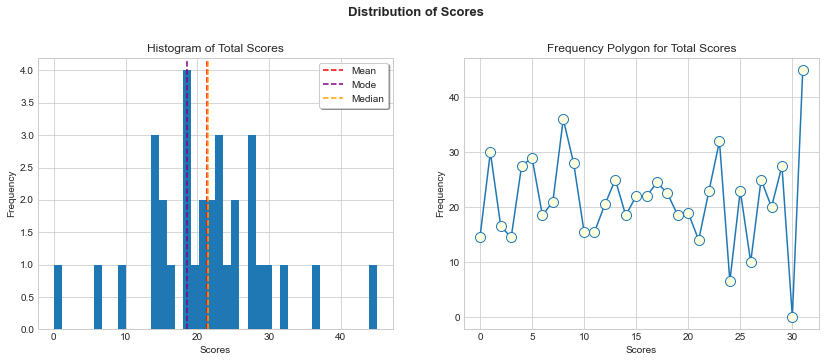

In [10]:
# histograms and frequency polygon
fig, [ax0, ax1] = plt.subplots(1,2)
fig.suptitle('Distribution of Scores', y=1.02, weight='bold', fontsize=13)

# total scores
ax0.hist(test['Total'], bins=40)
ax0.set(title='Histogram of Total Scores',
      xlabel='Scores',
      ylabel='Frequency')
ax0.axvline(stats.loc['mean'][0], linestyle='--', c='red', label='Mean')
ax0.axvline(stats.loc['mode'][0], linestyle='--', c='purple', label='Mode')
ax0.axvline(stats.loc['50%'][0], linestyle='--', c='orange', label='Median')

# total scores
ax1.plot(test['Total'],marker='.', linestyle='solid', markersize=20, markerfacecolor='lightyellow')
ax1.set(title='Frequency Polygon for Total Scores',
      xlabel='Scores',
      ylabel='Frequency')

# display legend
ax0.legend(frameon=True, fancybox=True, shadow=True)

# save the plot
plt.savefig('Data/distribution_of_scores.png', bbox_inches='tight');

<br>

#### Standard Scores.
___

In [11]:
# calculating z and T scores
test['z'] = np.round((test['Total'] - stats.loc['mean'][0])/stats.loc['std(pop)'][0],1)
test['T'] = test['z'] * 10 + 50
test.head()

,Student,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,...,Q15,Q16,Q17,Q18,Q19,Q20,Total,% Correct,z,T
0,Student01,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,14.5,72.5,-0.8,42.0
1,Student02,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0,3.0,...,2.0,0.0,3.0,0.0,1.0,3.0,30.0,150.0,1.0,60.0
2,Student03,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,0.0,1.0,2.0,1.0,1.0,3.0,16.5,82.5,-0.6,44.0
3,Student04,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,2.0,14.5,72.5,-0.8,42.0
4,Student05,1.0,1.0,2.0,1.0,4.0,1.0,0.0,0.0,3.0,...,2.0,2.0,3.0,0.0,2.0,0.0,27.5,137.5,0.7,57.0


In [12]:
# create stats for z and T
stats_for_scores = pd.DataFrame({'mean': [test['z'].mean(), test['T'].mean()],
                                 'std(pop)': [test['z'].std(ddof=0), test['T'].std(ddof=0)]})

stats_for_scores = stats_for_scores.T 
stats_for_scores.columns = ['z', 'T']

# add it to the rest of the stats
stats = stats.join(np.round(stats_for_scores,3))

<br>

#### Item analysis
___

1. Item facility

In [13]:
# sort scored in descending order
sorted_scores = test.sort_values('Total', ascending=False)
sorted_scores.head(5)

,Student,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,...,Q15,Q16,Q17,Q18,Q19,Q20,Total,% Correct,z,T
31,MAX POSS.,1.0,2.0,3.0,2.0,4.0,3.0,1.0,2.0,3.0,...,2.0,3.0,4.0,1.0,2.0,3.0,45.0,225.0,2.8,78.0
8,Student09,1.0,2.0,2.0,1.0,4.0,3.0,1.0,1.0,2.0,...,2.0,3.0,2.0,1.0,2.0,1.0,36.0,180.0,1.7,67.0
23,Student24,1.0,2.0,3.0,2.0,3.0,3.0,0.0,2.0,3.0,...,2.0,3.0,3.0,1.0,1.0,0.0,32.0,160.0,1.3,63.0
1,Student02,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0,3.0,...,2.0,0.0,3.0,0.0,1.0,3.0,30.0,150.0,1.0,60.0
5,Student06,1.0,0.0,2.0,1.0,3.0,3.0,1.0,1.0,2.0,...,1.0,0.0,4.0,1.0,1.0,1.0,29.0,145.0,0.9,59.0


In [14]:
# calculate total IF, upper and lower IF for each quize
IF = pd.DataFrame({'IF*': np.round(sorted_scores.drop(['Student', 'Total', '% Correct', 'z', 'T'], axis=1).mean(), 3)}).T
IF_upper = pd.DataFrame({'IF*(upper)': np.round(sorted_scores.drop(['Student', 'Total', '% Correct', 'z', 'T'], axis=1)[:10].mean(), 3)}).T
IF_lower = pd.DataFrame({'IF*(lower)': np.round(sorted_scores.drop(['Student', 'Total', '% Correct', 'z', 'T'], axis=1)[-10:].mean(), 3)}).T

# concat them into one dataframe
item_facility = pd.concat([IF, IF_upper, IF_lower])
item_facility.index.name = 'Item facility'
item_facility

,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
Item facility,,,,,,,,,,,,,,,,,,,,
IF*,0.548,0.839,1.194,1.0,2.129,1.645,0.452,0.774,1.419,0.968,0.548,1.677,0.968,0.355,0.935,0.968,2.387,0.581,1.258,1.452
IF*(upper),0.800,1.200,2.200,1.4,3.300,2.200,0.600,1.200,2.200,1.000,0.600,2.100,1.300,0.700,1.300,1.800,3.100,0.700,1.400,1.400
IF*(lower),0.111,0.333,0.667,0.0,0.889,1.444,0.111,0.667,0.333,1.333,0.500,1.222,0.556,0.000,0.444,0.667,1.000,0.778,1.000,1.889


<br>

2. Item discrimination

In [15]:
# compute discrimination
IDul = pd.DataFrame({'ID*(UL)': item_facility.loc['IF*(upper)'] - item_facility.loc['IF*(lower)']}).T
r_it = pd.DataFrame({'r(item-total)': np.round(test.drop(['Student', 'Total', '% Correct', 'z', 'T'], axis=1).corrwith(test['Total'],method='pearson'), 3)}).T

In [16]:
# concat the results into one dataframe
discrimination = pd.concat([IDul, r_it])
discrimination.index.name = 'Item discrimination'
discrimination

,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
Item discrimination,,,,,,,,,,,,,,,,,,,,
ID*(UL),0.689,0.867,1.533,1.400,2.411,0.756,0.489,0.533,1.867,-0.333,0.10,0.878,0.744,0.700,0.856,1.133,2.100,-0.078,0.400,-0.489
r(item-total),0.519,0.492,0.571,0.554,0.717,0.397,0.389,0.369,0.602,0.024,0.16,0.303,0.480,0.585,0.545,0.614,0.622,0.028,0.219,0.033


<br>

#### Interpretation
___

1. Item facility

In [17]:
# highlight the questions for revision based on IF
IF.style.apply(lambda x: ["background: yellow" if .29999999 > v or v > 0.6999999 else "" for v in x], axis = 1)

,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
IF*,0.548000,0.839000,1.194000,1.000000,2.129000,1.645000,0.452000,0.774000,1.419000,0.968000,0.548000,1.677000,0.968000,0.355000,0.935000,0.968000,2.387000,0.581000,1.258000,1.452000


In [18]:
# create a list of questions for revesion
quest_IF = IF.apply(lambda x: [v if .30 > v or v > 0.70 else "" for v in x]).any()
rev_IF = pd.DataFrame({'IF*': list(IF.columns[quest_IF])})
rev_IF

,IF*
0,Q02
1,Q03
2,Q04
3,Q05
4,Q06
5,Q08
6,Q09
7,Q10
8,Q12
9,Q13


<br>

2. Item discrimination


In [19]:
# highlight the questions for revision
IDul.style.apply(lambda x: ["background: yellow" if v < 0.3999999999 else "" for v in x], axis = 1)

,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
ID*(UL),0.689000,0.867000,1.533000,1.400000,2.411000,0.756000,0.489000,0.533000,1.867000,-0.333000,0.100000,0.878000,0.744000,0.700000,0.856000,1.133000,2.100000,-0.078000,0.400000,-0.489000


In [20]:
r_it.style.apply(lambda x: ["background: yellow" if v < 0.2999999999 else "" for v in x], axis = 1)

,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
r(item-total),0.519000,0.492000,0.571000,0.554000,0.717000,0.397000,0.389000,0.369000,0.602000,0.024000,0.160000,0.303000,0.480000,0.585000,0.545000,0.614000,0.622000,0.028000,0.219000,0.033000


In [21]:
# create a list of questions for revesion
quest_UDul = IDul.apply(lambda x: [v if v < 0.3999999999 else "" for v in x]).any()
rev_IDul = pd.DataFrame({'ID*(UL)': list(IDul.columns[quest_UDul])})
rev_IDul

,ID*(UL)
0,Q10
1,Q11
2,Q18
3,Q20


In [23]:
quest_rit = r_it.apply(lambda x: [v if v < 0.2999999999 else "" for v in x]).any()
rev_rit = pd.DataFrame({'r(item-total)': list(r_it.columns[quest_rit])})
rev_rit

,r(item-total)
0,Q10
1,Q11
2,Q18
3,Q19
4,Q20


In [24]:
# join all questions flagged for revision into one dataframe
flagged = rev_IDul.join([rev_rit,rev_IF]).T
flagged.index.name = 'Flagged'
flagged = flagged.reindex(index=['IF*', 'ID*(UL)', 'r(item-total)'])
flagged

,0,1,2,3
Flagged,,,,
IF*,Q02,Q03,Q04,Q05
ID*(UL),Q10,Q11,Q18,Q20
r(item-total),Q10,Q11,Q18,Q19


<br>

#### Save the results to an excel file
___

In [25]:
# write and save all dataframes to the excel file 
writer = pd.ExcelWriter('Data/one_test_polytomous_analysis.xlsx', engine='xlsxwriter')
test.to_excel(writer, index = False)
item_facility.to_excel(writer, startrow=len(test)+3, index=True)
discrimination.to_excel(writer, startrow=len(test)+len(item_facility)+5, index=True)
flagged.to_excel(writer, startrow=len(test)+len(item_facility)+len(discrimination) + 7, index=True)
stats.to_excel(writer, startrow=len(test)+len(item_facility)+len(discrimination) + len(flagged) + 10, index=True)

# insert the image into the worksheet
workbook = writer.book
worksheet = writer.sheets['Sheet1']
worksheet.insert_image('H49', 'Data/distribution_of_scores.png')

# styling
column_settings = [{'header': column} for column in test.columns]
(max_row, max_col) = test.shape
worksheet.add_table(0, 0, max_row, max_col - 1, {'columns': column_settings})
writer.save()

<br>

___
#### End.